### Script for reading data for Problem 5.2 (data_BohrHypothesis.txt) in Applied Statistics 2022 problem set:

This script reads the file __"data_BohrHypothesis.txt"__ for Problem 5.2 in the problem set of Applied Statistics 2022/23. This data files contains 216545 entries in two columns: 

* **wavelength** (nm) of radiation,
* **voltage** (V) of power supply.


####  Author: 
- Troels Petersen (Niels Bohr Institute, petersen@nbi.dk)

####  Date:   
 - 1st of December 2022

In [106]:
import pandas as pd
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import sympy as sp
sys.path.append('../External_Functions')
from statsmodels.sandbox.stats.runs import runstest_1samp
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

In [107]:
dataframe = pd.read_csv('data_BohrHypothesis.csv', header=0, index_col=None)
wavel, voltage = dataframe.values.T
dataframe

,2439.703,134.833
0,1276.206,102.063
1,1665.593,98.818
2,1868.467,123.123
3,2075.338,103.849
4,1962.510,96.542
...,...,...
216539,1761.204,137.935
216540,1748.524,153.508
216541,1555.461,76.994
216542,1367.070,87.436


Print the first 10 entries to check the content of the file:

In [108]:
for i in range(10):
    print(f"  wavelength = {wavel[i]:4.2f} nm    voltage = {voltage[i]:6.2f} V")

  wavelength = 1276.21 nm    voltage = 102.06 V
  wavelength = 1665.59 nm    voltage =  98.82 V
  wavelength = 1868.47 nm    voltage = 123.12 V
  wavelength = 2075.34 nm    voltage = 103.85 V
  wavelength = 1962.51 nm    voltage =  96.54 V
  wavelength = 1563.69 nm    voltage =  91.83 V
  wavelength = 1395.86 nm    voltage = 107.95 V
  wavelength = 2112.96 nm    voltage =  74.54 V
  wavelength = 1434.76 nm    voltage = 129.24 V
  wavelength = 1985.00 nm    voltage = 149.94 V


In [109]:
Nbins=1000
xmin,xmax = 1210,2200

bin_width = (xmax-xmin)/Nbins

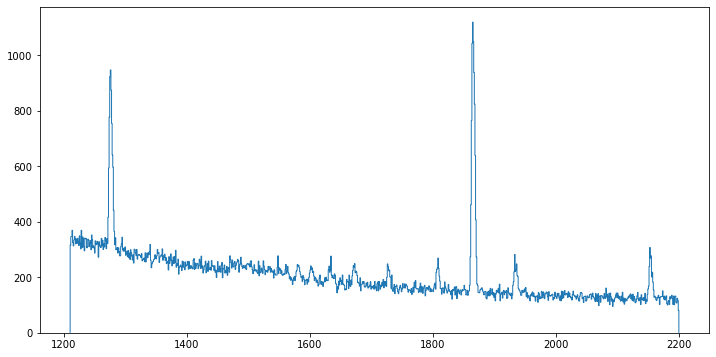

In [110]:
#plot the data
fig, ax = plt.subplots(figsize=(12,6))
counts, bins,_ = ax.hist(wavel, bins=Nbins, range=(xmin,xmax), histtype='step', label='data')

bin_centers = (bins[:-1] + bins[1:])/2

In [111]:
# fit peaks at 1875 and 1282 nm with gaussian and background with linear function
def gaussian(x, mu, sigma, N):
    return N * bin_width * stats.norm.pdf(x, mu, sigma)

def linear(x, a, b):
    return a*x + b

def model(x, mu1, sigma1, N1, a, b):
    return gaussian(x, mu1, sigma1, N1) + linear(x, a, b)

#mask the peaks from counts and bins
mask = (bin_centers > 1250) & (bin_centers< 1320)
counts1 = counts[mask]
counterrors1 = np.sqrt(counts1)
bins1 = bin_centers[mask]

mask = (bin_centers > 1840) & (bin_centers < 1920)
counts2 = counts[mask]
counterrors2 = np.sqrt(counts2)
bins2 = bin_centers[mask]

#fit the peaks
minuit1 = Minuit(Chi2Regression(model, bins1, counts1, counterrors1), mu1=1282, sigma1=2, N1=5000, a=0, b=0)
minuit1.migrad()
chi2_1 = minuit1.fval
ndf1 = len(counts1) - 5
p1 = stats.chi2.sf(chi2_1, ndf1)
d = {
    'mu1': [minuit1.values['mu1'], minuit1.errors['mu1']],
    'sigma1': [minuit1.values['sigma1'], minuit1.errors['sigma1']],
    'N1': [minuit1.values['N1'], minuit1.errors['N1']],
    'a': [minuit1.values['a'], minuit1.errors['a']],
    'b': [minuit1.values['b'], minuit1.errors['b']],
    'chi2': chi2_1,
    'ndf': ndf1,
    'p': p1
    }
test = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.05, 0.95, test, ax, fontsize=12)

minuit2 = Minuit(Chi2Regression(model, bins2, counts2, counterrors2), mu1=1875, sigma1=2, N1=5000, a=0, b=0)
minuit2.migrad()
chi2_2 = minuit2.fval
ndf2 = len(counts2) - 5
p2 = stats.chi2.sf(chi2_2, ndf2)
d = {
    'mu2': [minuit2.values['mu1'], minuit2.errors['mu1']],
    'sigma2': [minuit2.values['sigma1'], minuit2.errors['sigma1']],
    'N2': [minuit2.values['N1'], minuit2.errors['N1']],
    'a': [minuit2.values['a'], minuit2.errors['a']],
    'b': [minuit2.values['b'], minuit2.errors['b']],
    'chi2': chi2_2,
    'ndf': ndf2,
    'p': p2
    }
test = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.68, 0.7, test, ax, fontsize=12)

#plot the fit
x1 = np.linspace(1250, 1320, 1000)
x2 = np.linspace(1840, 1920, 1000)
ax.plot(x1, model(x1, *minuit1.values), label='fit1')
ax.plot(x2, model(x2, *minuit2.values), label='fit2')
ax.legend()
ax.set_xlabel('wavelength [nm]')
ax.set_ylabel('counts')
fig
# fig.savefig('Init_bohr_fit.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [118]:
#ztest for the standard deviation of the two peaks



#ztest for the std of the two peaks
ztest = (minuit1.values['sigma1'] - minuit2.values['sigma1'])**2/np.sqrt(minuit1.errors['sigma1']**2 + minuit2.errors['sigma1']**2)



#find the p-value for the 2-sided z-test
pvalue = stats.norm.sf(abs(ztest))*2
print(f"p-value for the 2-sided z-test: {pvalue:.3f}")
print(f'ztest: {ztest:.3f}')

p-value for the 2-sided z-test: 0.987
ztest: 0.016


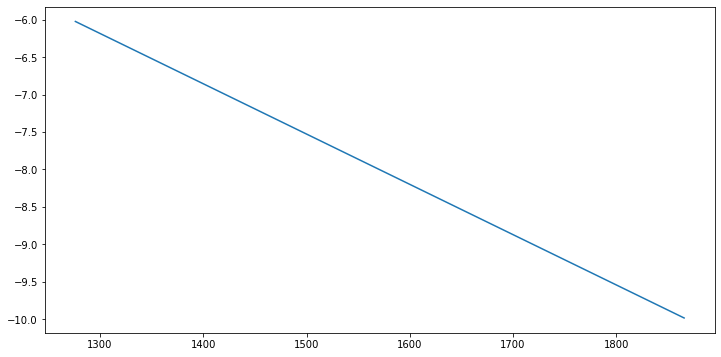

In [113]:
Theo1 = 1282.174
Theo2 = 1875.637
dwavel1 = minuit1.values['mu1'] - Theo1
dwavel2 = minuit2.values['mu1'] - Theo2
#plot wavelength vs wavelength difference
fig, ax = plt.subplots(figsize=(12,6))
ax.plot([minuit1.values['mu1'],minuit2.values['mu1']] , [dwavel1,dwavel2],)

In [114]:
#fit the data with a linear function
def linear(x, a, b):
    return a*x + b

minuitlin = Minuit(Chi2Regression(linear, [minuit1.values['mu1'],minuit2.values['mu1']] , [dwavel1,dwavel2]), a=0, b=0)
minuitlin.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.027e-23                  │              Nfcn = 36               │
│ EDM = 7.03e-23 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -0.0067  │  0.0024   │            │            │         │         │       │
│ 1 │ b    │     3     │     4     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 5.76e-06 -0.00904 │
│ b │ -0.00904     14.7 │
└───┴───────────────────┘

In [120]:
print(minuitlin.values['a'])
print(minuitlin.values['b'])
print(minuitlin.errors['a'])
print(minuitlin.errors['b'])

-0.006723526920012618
2.5567189292694055
0.0023990072933321557
3.834364914660151


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1000


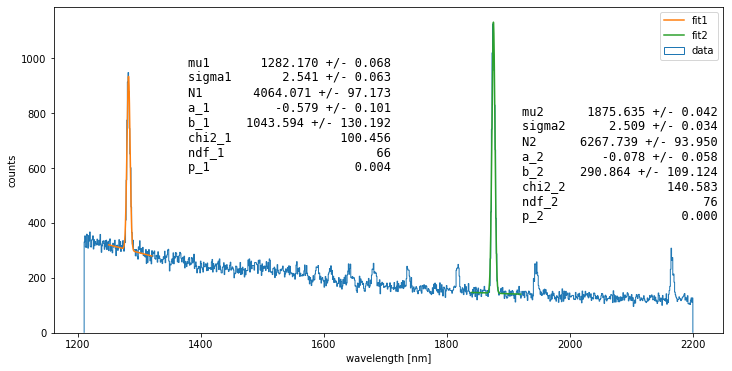

In [121]:
#Calibrate scale with the linear fit
wavel_scaled = wavel / 1-(minuitlin.values['a']*wavel + minuitlin.values['b'])



#plot the calibrated scale  
fig, ax = plt.subplots(figsize=(12,6))
count_linc, bin_linc,_ = ax.hist(wavel_scaled, bins=Nbins, range=(xmin,xmax), histtype='step', label='data')

bin_linc_center = (bin_linc[:-1] + bin_linc[1:])/2

# mask the peaks
mask1 = (bin_linc_center > 1250) & (bin_linc_center < 1320)
print(len(mask1))
counts1_linc = count_linc[mask1]
count1_errors_linc1 = np.sqrt(counts1_linc)
bins1_linc = bin_linc_center[mask1]


mask2 = (bin_linc_center > 1840) & (bin_linc_center < 1920)
counts2_linc = count_linc[mask2]
count2_errors_linc2 = np.sqrt(counts2_linc)
bins2_linc = bin_linc_center[mask2]

#fit the peaks
lin_cal1 = Minuit(Chi2Regression(model, bins1_linc, counts1_linc, count1_errors_linc1), mu1=Theo1, sigma1=2, N1=5000, a=0, b=0)
lin_cal1.migrad()
chi2_lin_cal1 = lin_cal1.fval
ndf_lin_cal1 = len(counts1_linc) - 5
p_lin_cal1 = stats.chi2.sf(chi2_lin_cal1, ndf_lin_cal1)
d = {'mu1': [lin_cal1.values['mu1'], lin_cal1.errors['mu1']],
    'sigma1': [lin_cal1.values['sigma1'], lin_cal1.errors['sigma1']],
    'N1': [lin_cal1.values['N1'], lin_cal1.errors['N1']],
    'a_1': [lin_cal1.values['a'], lin_cal1.errors['a']],
    'b_1': [lin_cal1.values['b'], lin_cal1.errors['b']],
    'chi2_1': chi2_lin_cal1,
    'ndf_1': ndf_lin_cal1,
    'p_1': p_lin_cal1}
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.2, 0.85, text, ax, fontsize=12)

lin_cal2 = Minuit(Chi2Regression(model, bins2_linc, counts2_linc, count2_errors_linc2), mu1=Theo2, sigma1=2, N1=5000, a=0, b=0)
lin_cal2.migrad()
chi2_lin_cal2 = lin_cal2.fval
ndf_lin_cal2 = len(counts2_linc) - 5
p_lin_cal2 = stats.chi2.sf(chi2_lin_cal2, ndf_lin_cal2)
d = {'mu2': [lin_cal2.values['mu1'], lin_cal2.errors['mu1']],
    'sigma2': [lin_cal2.values['sigma1'], lin_cal2.errors['sigma1']],
    'N2': [lin_cal2.values['N1'], lin_cal2.errors['N1']],
    'a_2': [lin_cal2.values['a'], lin_cal2.errors['a']],
    'b_2': [lin_cal2.values['b'], lin_cal2.errors['b']],
    'chi2_2': chi2_lin_cal2,
    'ndf_2': ndf_lin_cal2,
    'p_2': p_lin_cal2}
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.7, 0.7, text, ax, fontsize=12)

#plot the fit

x1 = np.linspace(1250, 1320, 1000)
x2 = np.linspace(1840, 1920, 1000)
ax.plot(x1, model(x1, *lin_cal1.values), label='fit1')
ax.plot(x2, model(x2, *lin_cal2.values), label='fit2')

ax.set_xlabel('wavelength [nm]')
ax.set_ylabel('counts')
ax.legend()

fig.savefig('Lin_cal_2peaks.eps',bbox_inches='tight')


(1210.0, 2200.0)

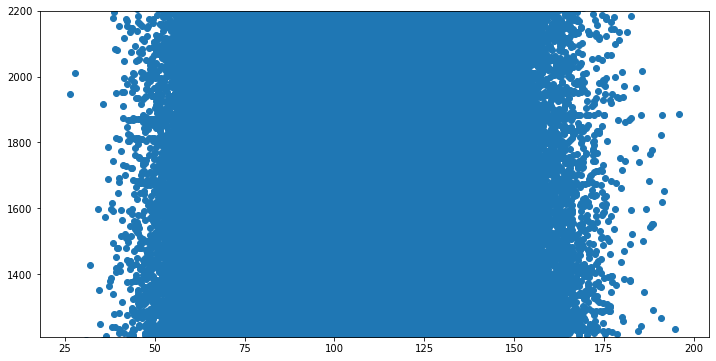

In [124]:
#plot wavelength vs voltage
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(voltage, wavel_scaled,'o', label='data')
ax.set_ylim((1210,2200))